<a href="https://colab.research.google.com/github/KirteshVerma/Bike-Sharing-Demand/blob/main/Kirtesh_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path = ('/content/drive/MyDrive/Dataset/SeoulBikeData.csv')

In [4]:
df = pd.read_csv(path, encoding = 'unicode escape')

In [5]:
original_data = df.copy()   # creating copy of the original dataset

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.describe().transpose() # Statistical description of numerical features

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [9]:
# checking the null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# checking duplicated values
len(df[df.duplicated()])

0

In [11]:
# visualising the null values

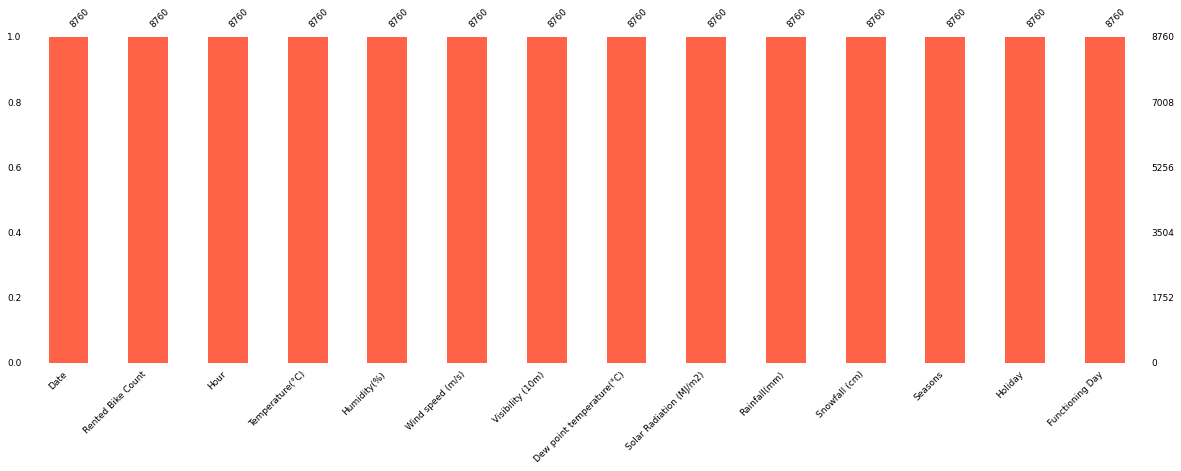

In [12]:
import missingno as msno
msno.bar(df,figsize = (20,6), color = 'tomato', sort = 'ascending', fontsize = 9)

## Exploratory Data Analysis(EDA)

In [13]:
df['Date']  = pd.to_datetime(df['Date']) # converting the Date column into Date_format


In [14]:
# extracting year, month and day of the week from date column

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df["DayOfWeek"] = df["Date"].dt.weekday

In [15]:
# replacing the numerical values of month and dayofweek with string value for better visualisation

df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)
df['DayOfWeek'].replace([0,1,2,3,4,5,6],['mon','tues','wed','thurs','fri','sat','sun'], inplace = True)

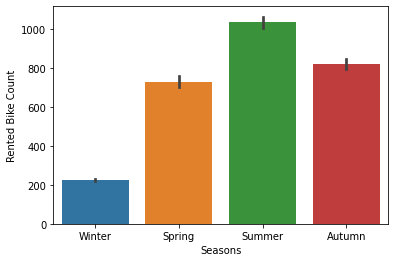

In [16]:
sns.barplot(df['Seasons'],df['Rented Bike Count'])

Summer and Autumn are the seasons where in highest numbers of bikes were rented

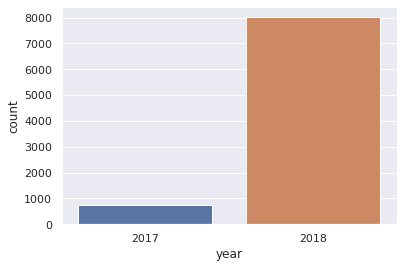

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = df)

Maximum number of bikes are rented in the year-2018

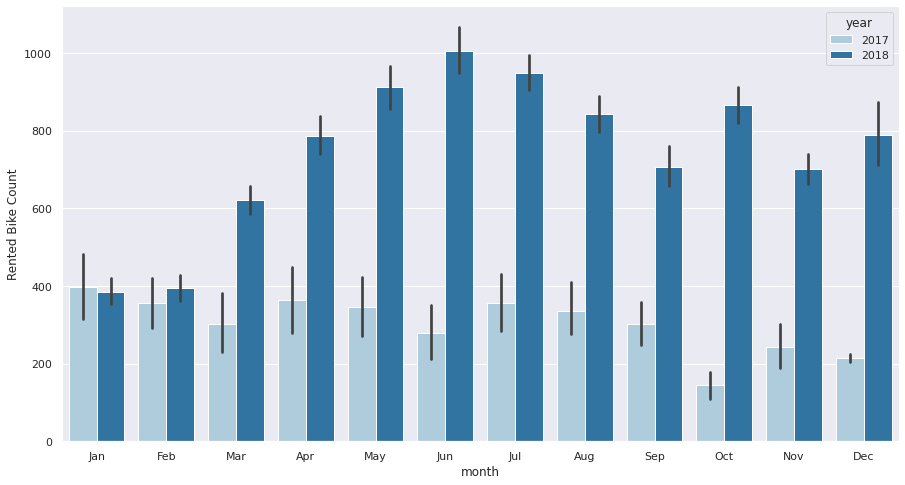

In [18]:
plt.figure(figsize=(15,8))
sns.barplot('month','Rented Bike Count',hue='year',data=df, palette='Paired')

observations:
1. Number of rented bikes starts increasing as we approach the summer seasons. 
2. Months of April, May and June falls under summer season and the number of rented bikes are highest during this time.
3. Number of rented bikes starts decreasing during July, August and september which which falls under rainy season.
4. Winter season is the one were least numbers of bikes were rented

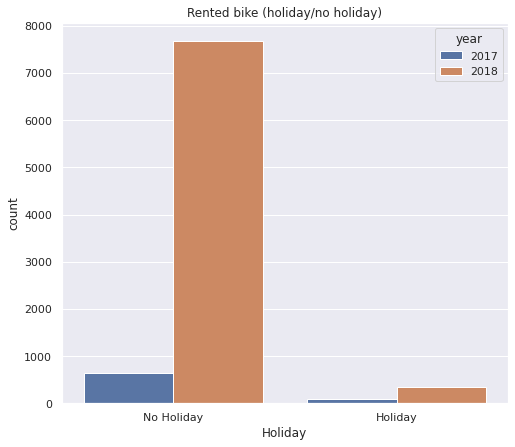

In [19]:
plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= df)
plt.title('Rented bike (holiday/no holiday)')
plt.show()

Most people rent bike when there is no holiday. So we can deduce that most of the people who rent bikes are generally the office going people.

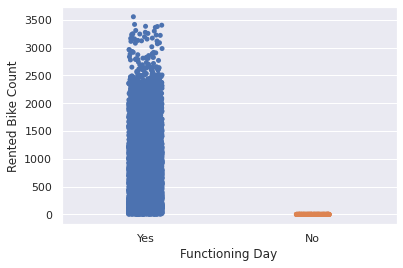

In [20]:
sns.stripplot(df['Functioning Day'],df['Rented Bike Count'],jitter = True)

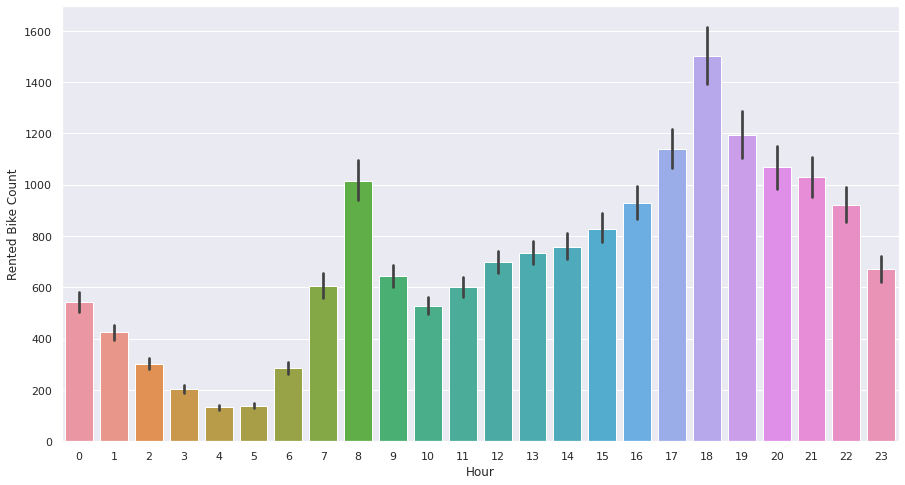

In [21]:
plt.figure(figsize=(15,8))
sns.barplot('Hour','Rented Bike Count', data = df)

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

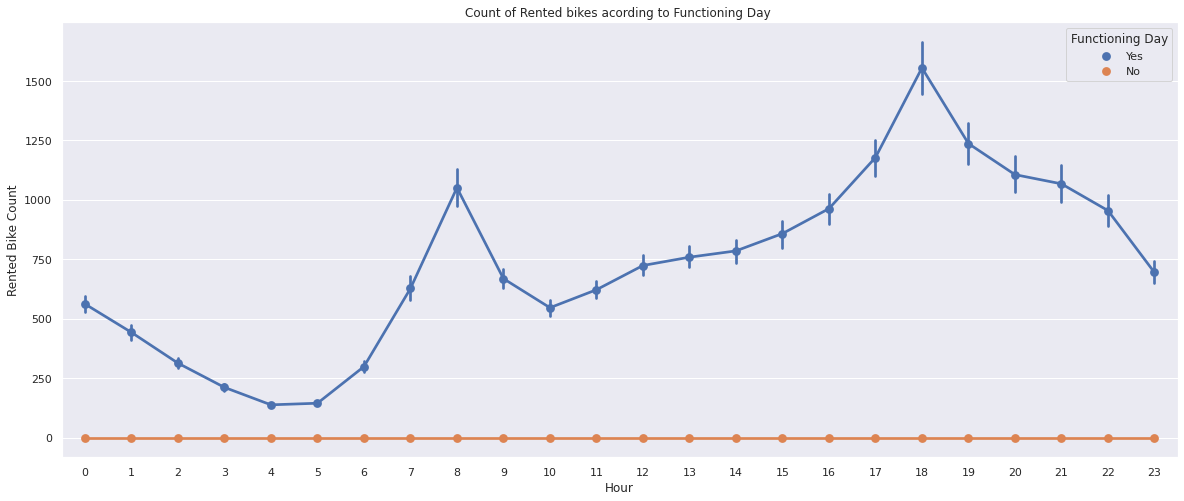

In [22]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

Observation:
The nubmer of rented bike count is at peak during 7 to 9 am and between 5 to 7pm. This is because of the office timing.

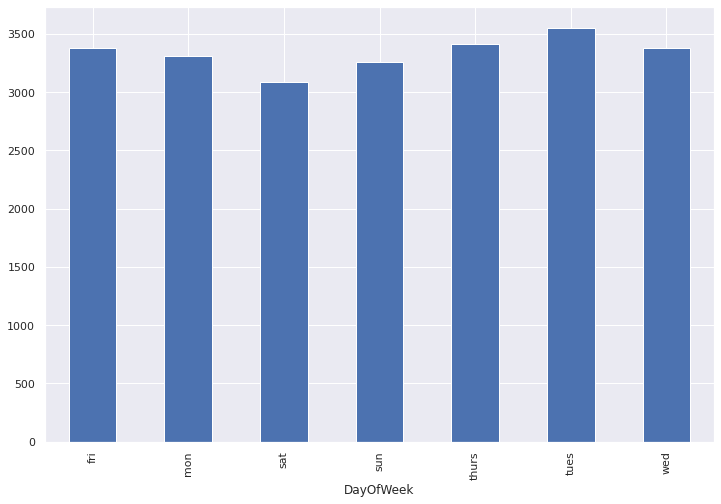

In [23]:
df.groupby('DayOfWeek')['Rented Bike Count'].max().plot(kind='bar',figsize = (12,8))

Observation:

1.Least numbers of bike are rented on weekend day i.e. Saturday and Sunday

2.Week days are the working day hence number of rented bike count is maximum

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

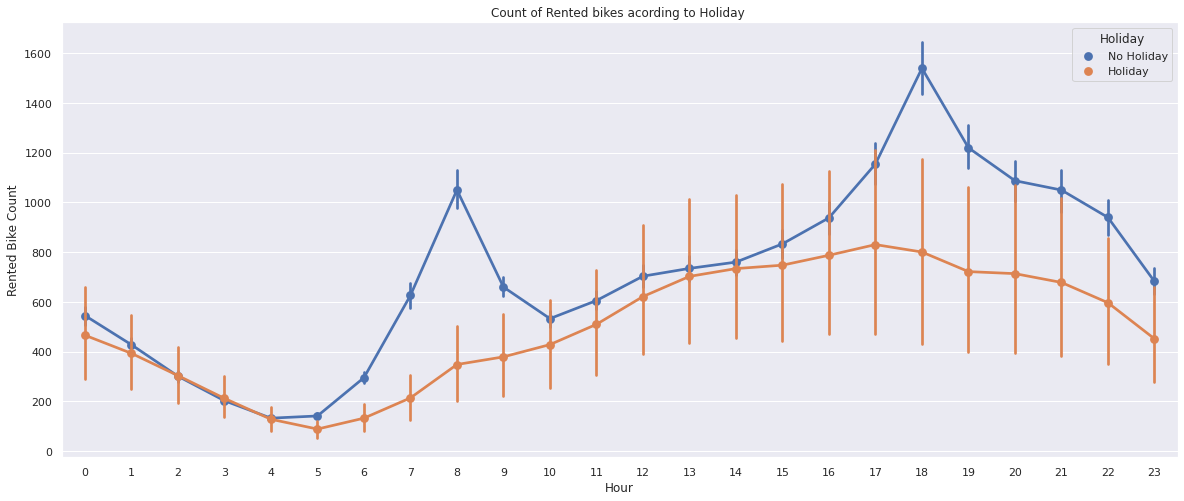

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

As we can see during the Holiday time the rented bike count is quite less as compared to working days.

#  outliers Detection

In [25]:
# outlier detection using Inter Quartile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
dtype: float64


In [26]:
features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','DayOfWeek']
new_features = [x for x in features if x not in list_0]

In [27]:
print(new_features) 

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [28]:
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
#filling the null values with the mean of the respective numerical feature

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())
df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

## Distribution of features

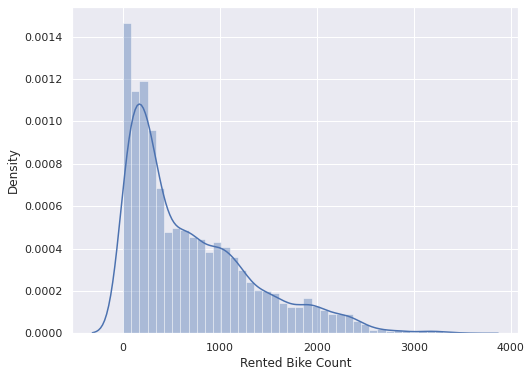

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rented Bike Count'])

The distribution of our dependent feature is right-skewed.

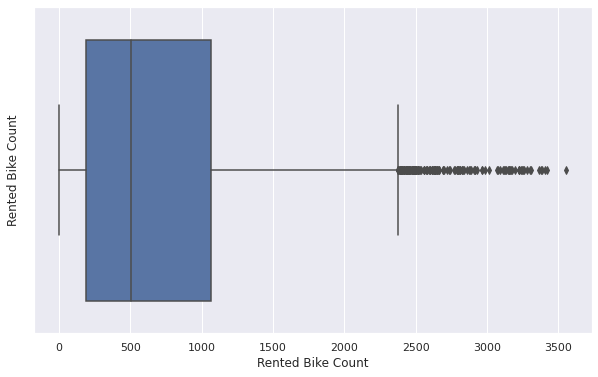

In [31]:
# looking at the outliers present in the rented bike count column with the help of boxplot
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

In [32]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

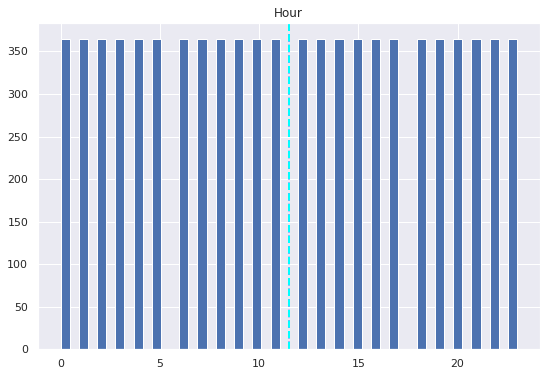

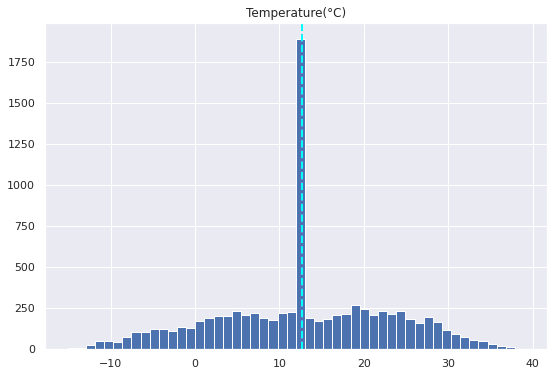

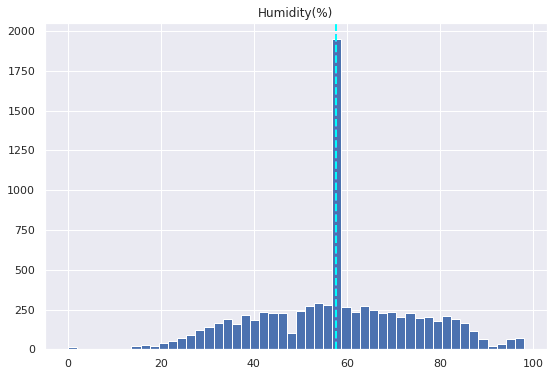

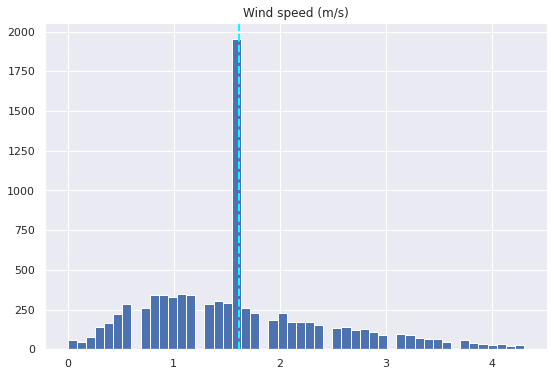

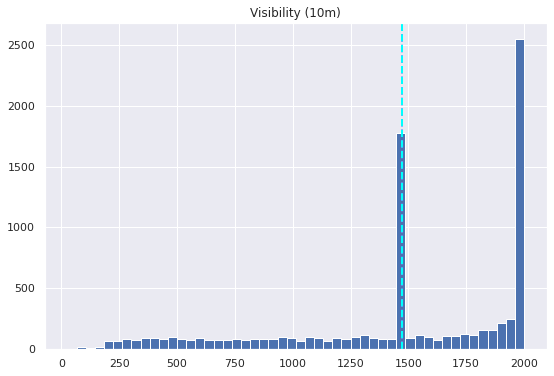

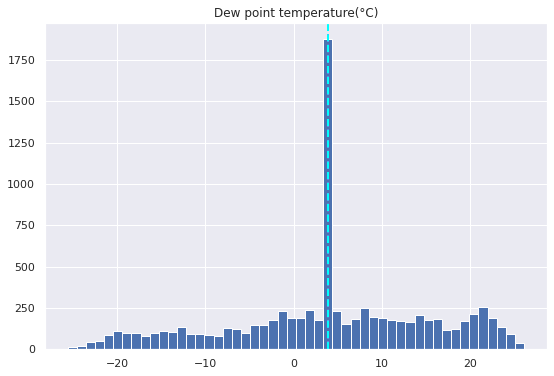

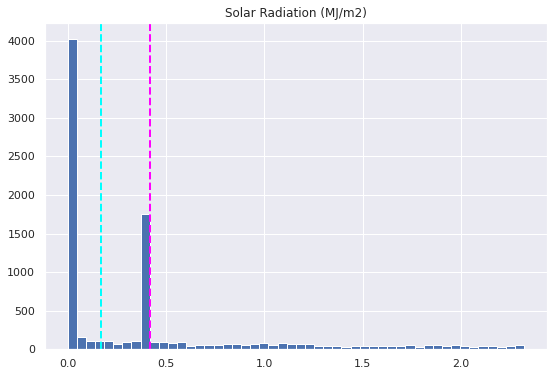

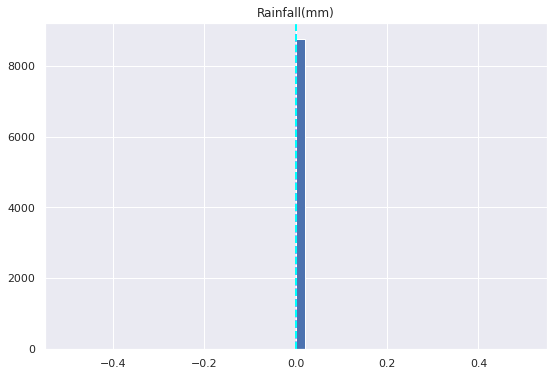

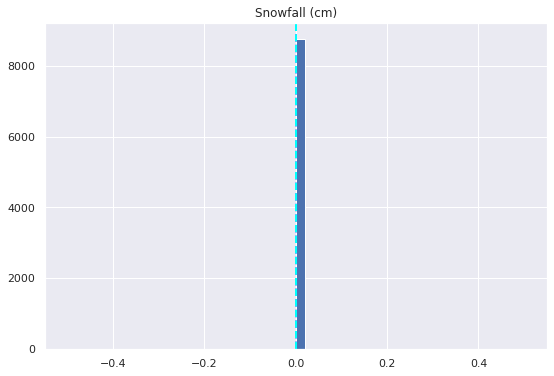

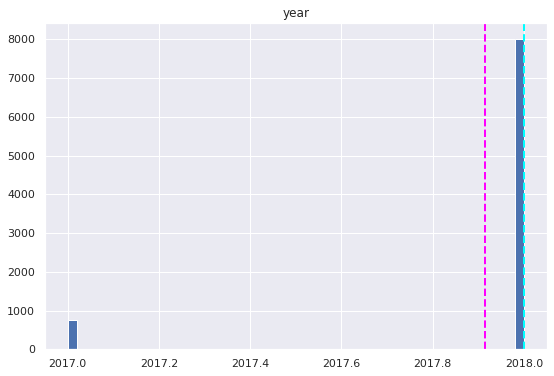

In [33]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## Linear relationship between dependent and independent feature

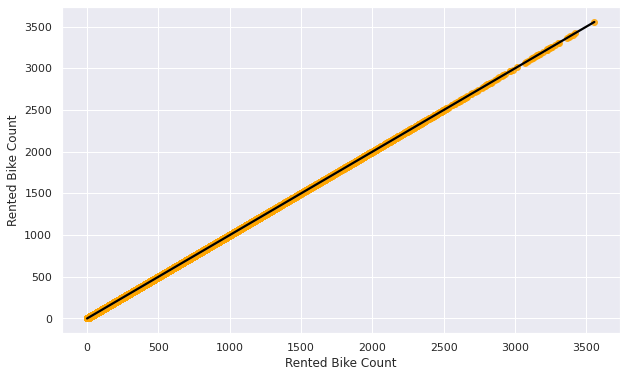

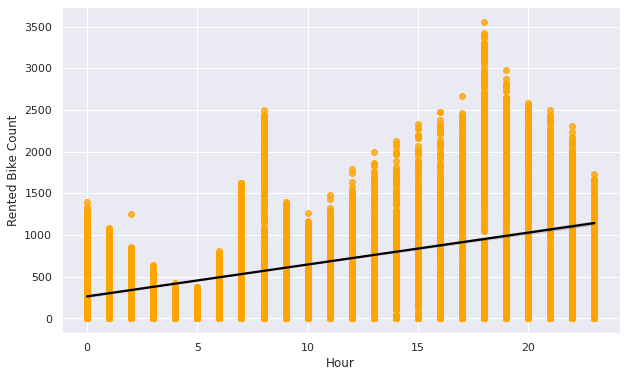

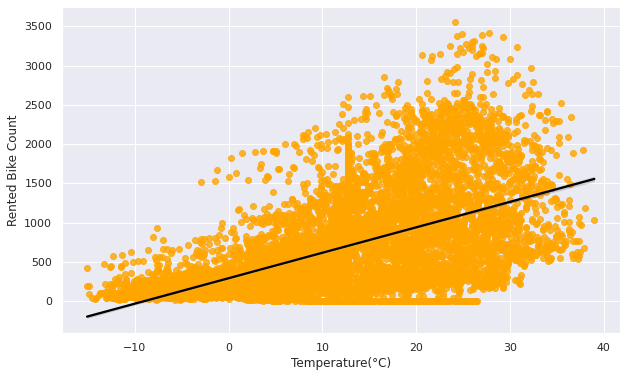

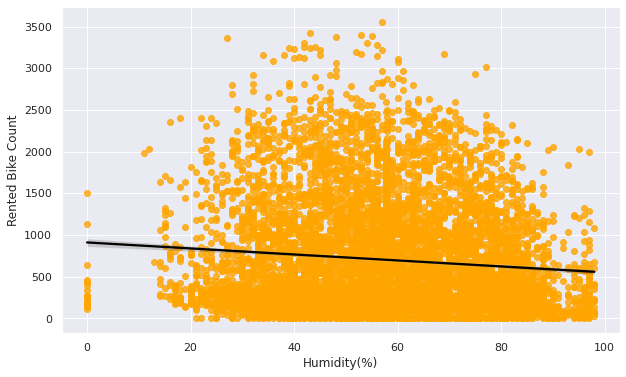

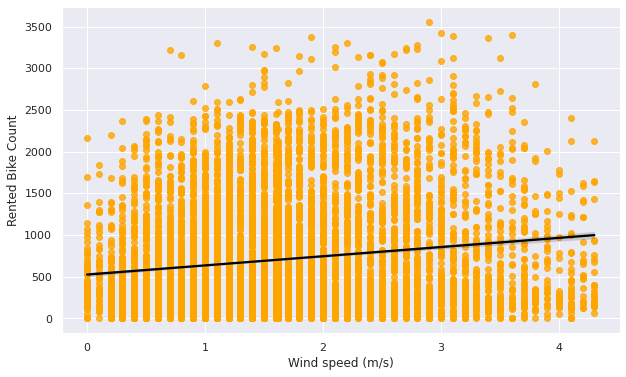

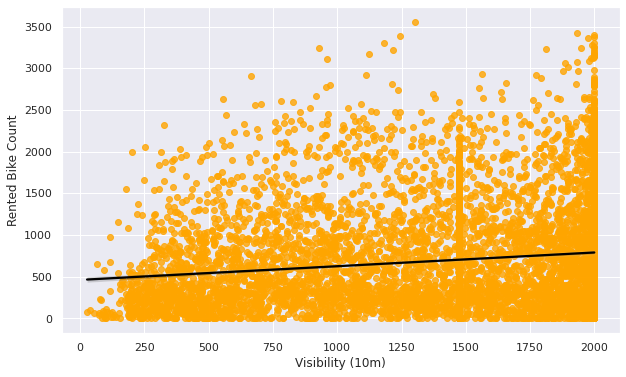

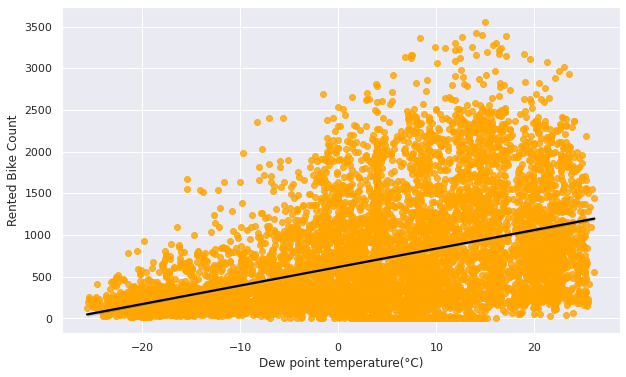

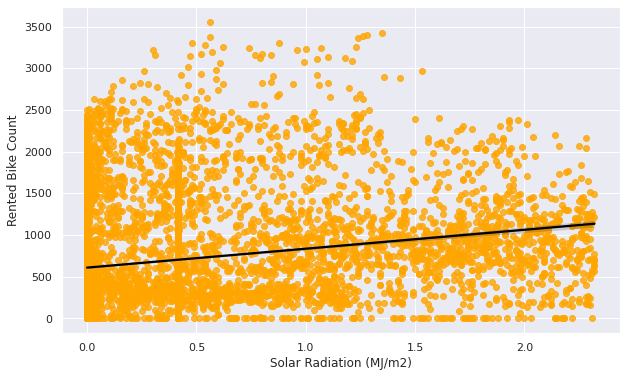

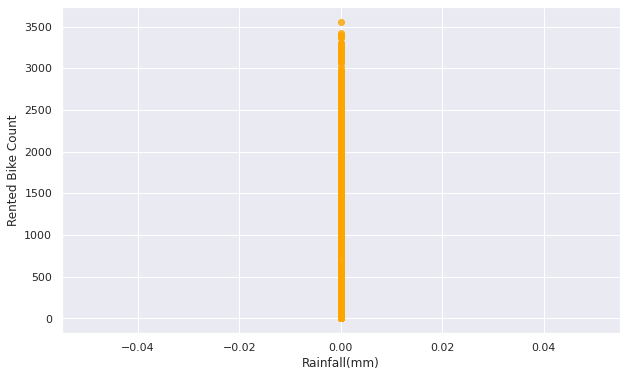

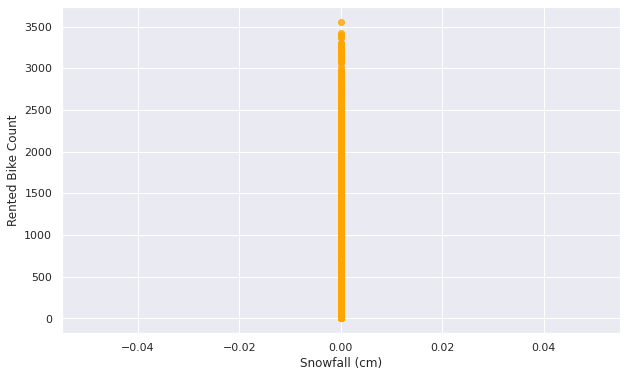

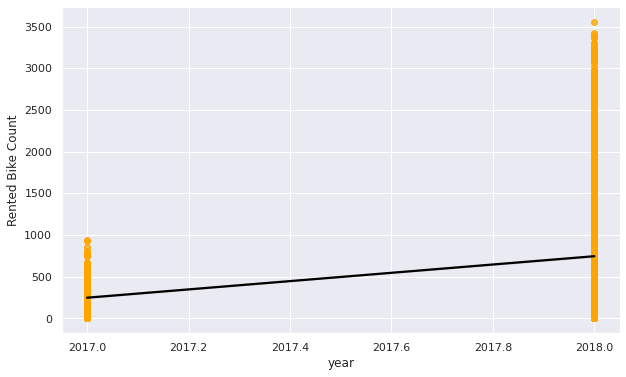

In [34]:
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

## square root Transformation 

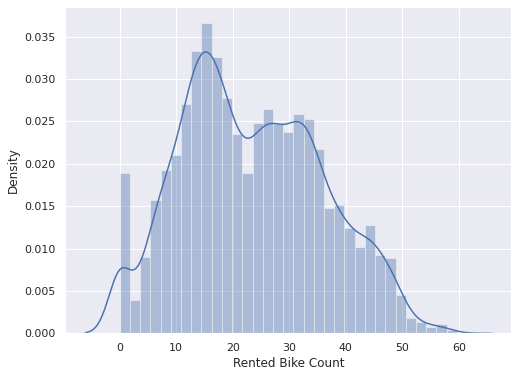

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="b")

The distribution has become somewhat Normal 

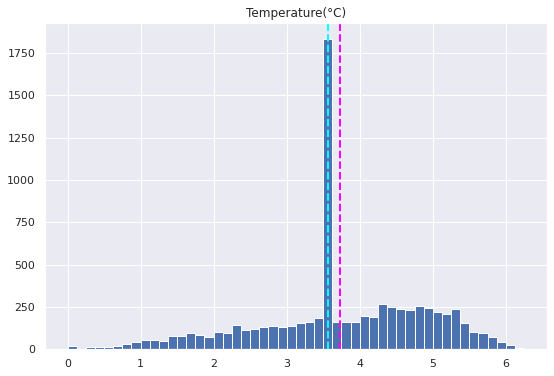

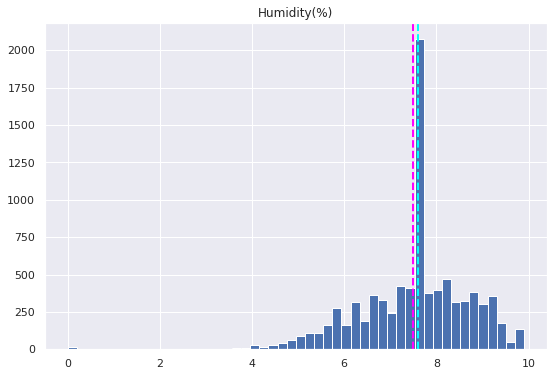

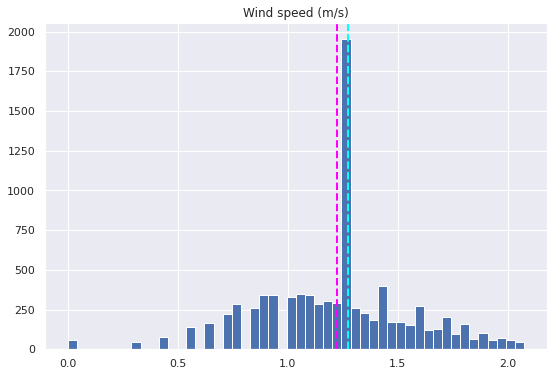

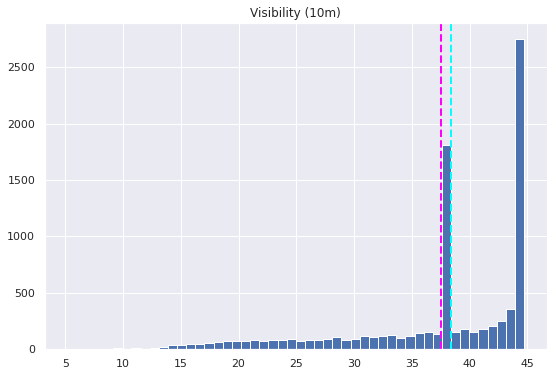

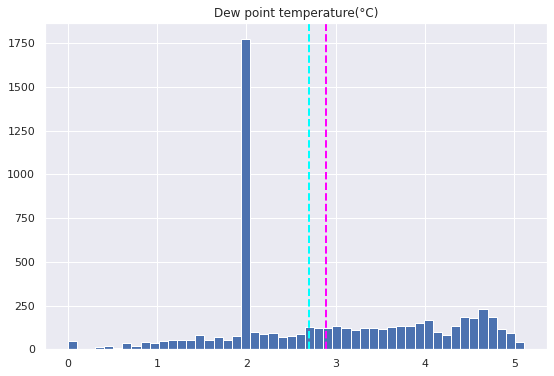

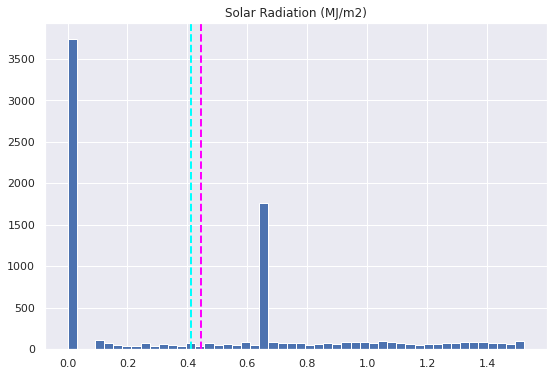

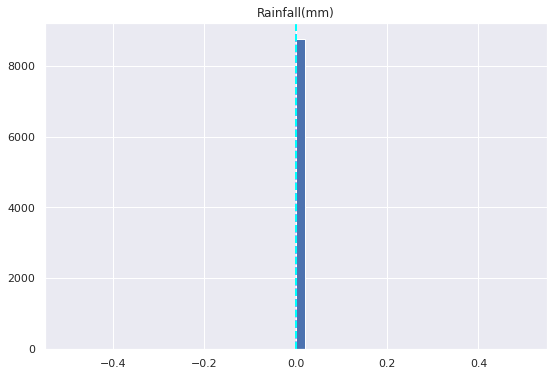

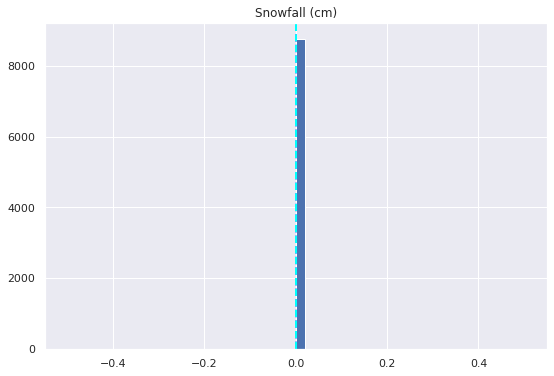

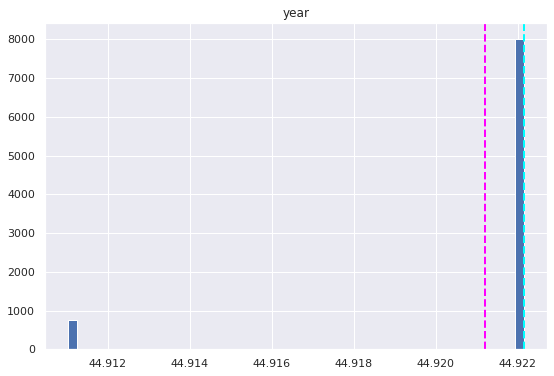

In [36]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Heatmap

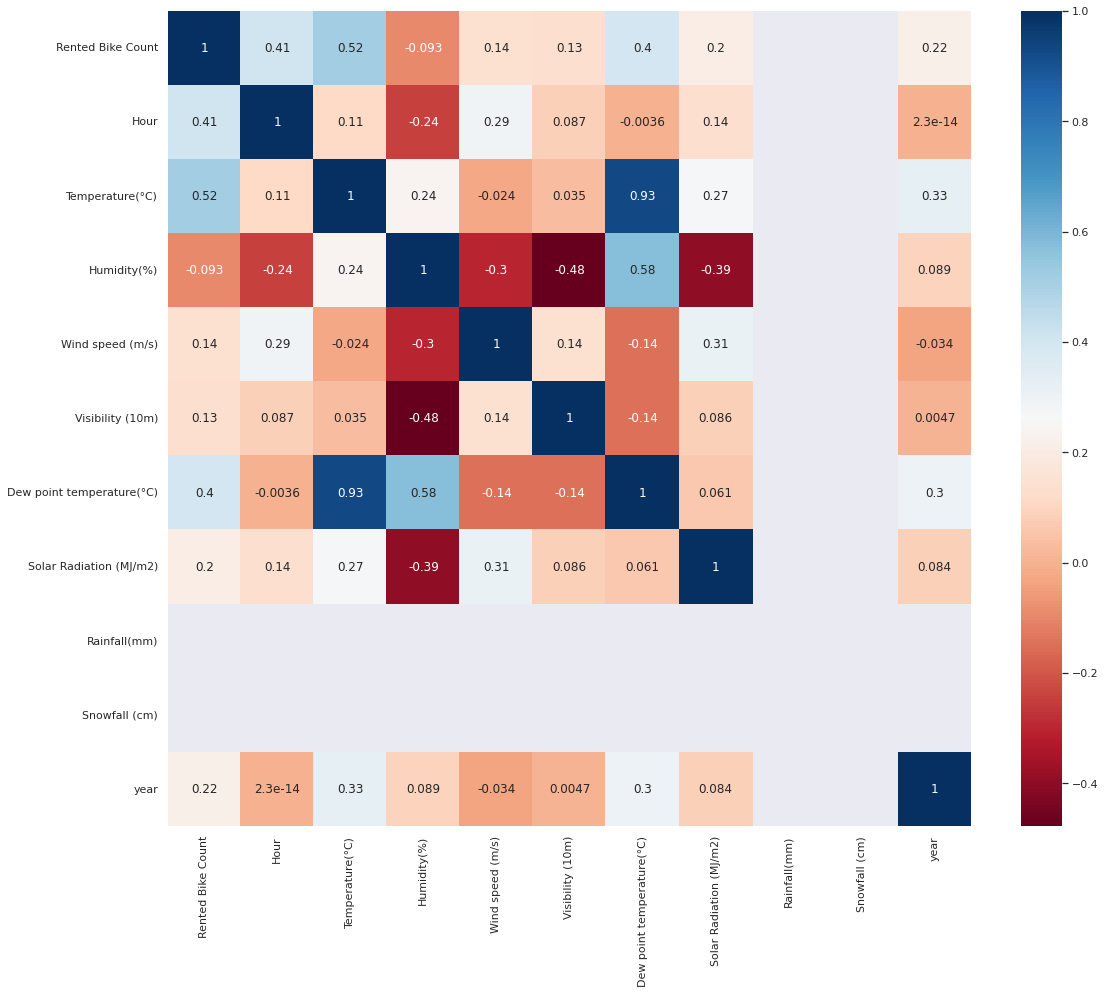

In [37]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()


The highest correlation of our dependent feature i.e. Rented bike count is with Dew point temperature. 
Also rainfall and snowfall has nan values so we can drop them as well.

In [38]:
df= df.drop(['Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)'],axis=1)

## Data Preprocessing

Label Encoding

In [39]:
# creating dummy variables of categorical columns
seasons = pd.get_dummies(df['Seasons'])

working_day = pd.get_dummies(df['Holiday'], prefix = 'Holiday')

F_day = pd.get_dummies(df['Functioning Day'], prefix = 'F_day')

month = pd.get_dummies(df['month'])

week_day = pd.get_dummies(df['DayOfWeek'])

year = pd.get_dummies(df['year'])

In [40]:
#concating our dummie variables and our original dataframe

df = pd.concat([df,seasons,working_day,F_day,month,week_day,year],axis=1)

In [41]:
# droping the columns whos dummy variables we have created

df.drop(['Seasons','Holiday','Functioning Day','DayOfWeek','month','year','Date'],axis=1,inplace=True)




## Calculating VIF




In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                    feature   VIF
0         Rented Bike Count  2.10
1                      Hour  1.40
2           Temperature(°C)  3.48
3               Humidity(%)  2.29
4          Wind speed (m/s)  1.29
5          Visibility (10m)  1.59
6   Solar Radiation (MJ/m2)  1.61
7                    Autumn   inf
8                    Spring   inf
9                    Summer   inf
10                   Winter   inf
11          Holiday_Holiday   inf
12       Holiday_No Holiday   inf
13                 F_day_No   inf
14                F_day_Yes   inf
15                      Apr   inf
16                      Aug   inf
17                      Dec   inf
18                      Feb   inf
19                      Jan   inf
20                      Jul   inf
21                      Jun   inf
22                      Mar   inf
23                      May   inf
24                      Nov   inf
25                      Oct   inf
26                      Sep   inf
27                      fri   inf
28            

Our dataset is ready for model fitting as the vif of columns is withing range( i.e. < 10)

## Model Building

In [43]:
# imporiting the necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [45]:

X = df.drop(columns=['Rented Bike Count'], axis=1) # independent variables
y = np.sqrt(df['Rented Bike Count'])# dependent variables

Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)

In [48]:
print(f' The shape of X_train is {X_train.shape}')
print(f' The shape of X_test is {X_test.shape}')

 The shape of X_train is (7008, 35)
 The shape of X_test is (1752, 35)


In [50]:
# Scaling the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)